In [77]:
# STEP 1: Import required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import shap


In [2]:
!pip install shap


In [3]:
import shap
import pandas as pd
import sklearn
print("Environment is ready")


Environment is ready


In [4]:
# STEP 2: Load the dataset

import pandas as pd

df = pd.read_csv("../data/student-mat.csv", sep=';')

df.head(395)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [78]:
print("Dataset shape:", df.shape)
df.info()


Dataset shape: (395, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   school             395 non-null    object
 1   sex                395 non-null    object
 2   age                395 non-null    int64 
 3   address            395 non-null    object
 4   famsize            395 non-null    object
 5   Pstatus            395 non-null    object
 6   Medu               395 non-null    int64 
 7   Fedu               395 non-null    int64 
 8   Mjob               395 non-null    object
 9   Fjob               395 non-null    object
 10  reason             395 non-null    object
 11  guardian           395 non-null    object
 12  traveltime         395 non-null    int64 
 13  studytime          395 non-null    int64 
 14  failures           395 non-null    int64 
 15  schoolsup          395 non-null    object
 16  famsup             

In [79]:
# Load both datasets
mat = pd.read_csv("../data/student-mat.csv", sep=';')
por = pd.read_csv("../data/student-por.csv", sep=';')

# Merge datasets on key columns
merge_cols = ['school','sex','age','address','famsize','Pstatus',
              'Medu','Fedu','Mjob','Fjob','reason','guardian']

# Inner merge
df_merged = pd.merge(mat, por, on=merge_cols, suffixes=('_mat','_por'))

# Check the shape
print(df_merged.shape)
df_merged.head(395)


(383, 54)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
379,MS,F,18,U,GT3,T,1,1,other,other,...,3,4,4,2,2,5,3,7,8,7
380,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
381,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [80]:
df_merged.info()
df_merged.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 54 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school          383 non-null    object
 1   sex             383 non-null    object
 2   age             383 non-null    int64 
 3   address         383 non-null    object
 4   famsize         383 non-null    object
 5   Pstatus         383 non-null    object
 6   Medu            383 non-null    int64 
 7   Fedu            383 non-null    int64 
 8   Mjob            383 non-null    object
 9   Fjob            383 non-null    object
 10  reason          383 non-null    object
 11  guardian        383 non-null    object
 12  traveltime_mat  383 non-null    int64 
 13  studytime_mat   383 non-null    int64 
 14  failures_mat    383 non-null    int64 
 15  schoolsup_mat   383 non-null    object
 16  famsup_mat      383 non-null    object
 17  paid_mat        383 non-null    object
 18  activities

,age,Medu,Fedu,traveltime_mat,studytime_mat,failures_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,...,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,...,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000,383.000000
mean,16.592689,2.791123,2.543081,1.438642,2.036554,0.295039,3.953003,3.229765,3.127937,1.472585,...,3.953003,3.237598,3.125326,1.472585,2.279373,3.577023,3.652742,12.107050,12.219321,12.509138
std,1.171721,1.084505,1.086614,0.694609,0.843032,0.740844,0.922599,0.997091,1.147192,0.885400,...,0.908301,0.993933,1.146340,0.885400,1.283307,1.402576,4.889570,2.553414,2.474782,2.943498
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


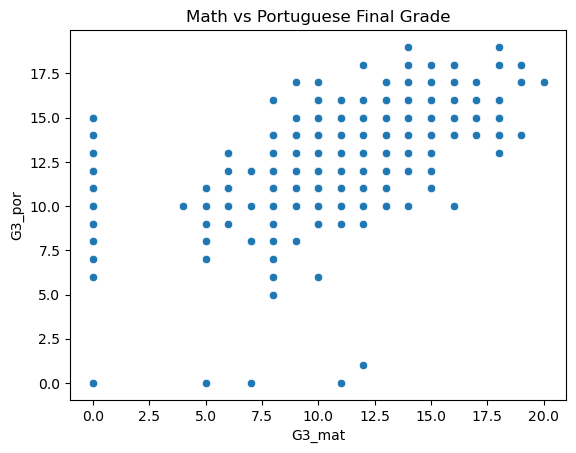

In [81]:
sns.scatterplot(x='G3_mat', y='G3_por', data=df_merged)
plt.title("Math vs Portuguese Final Grade")
plt.show()


In [82]:
import pandas as pd

# Load Math and Portuguese datasets
mat = pd.read_csv("../data/student-mat.csv", sep=';')
print(mat.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [83]:
import pandas as pd


por = pd.read_csv("../data/student-por.csv", sep=';')

# Quick check

print(por.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [84]:
# Convert relevant columns to numeric if necessary
numeric_cols = mat.select_dtypes(include='int64').columns  # usually already int64

# Just to be safe, for mat and por
mat[numeric_cols] = mat[numeric_cols].apply(pd.to_numeric, errors='coerce')
por[numeric_cols] = por[numeric_cols].apply(pd.to_numeric, errors='coerce')


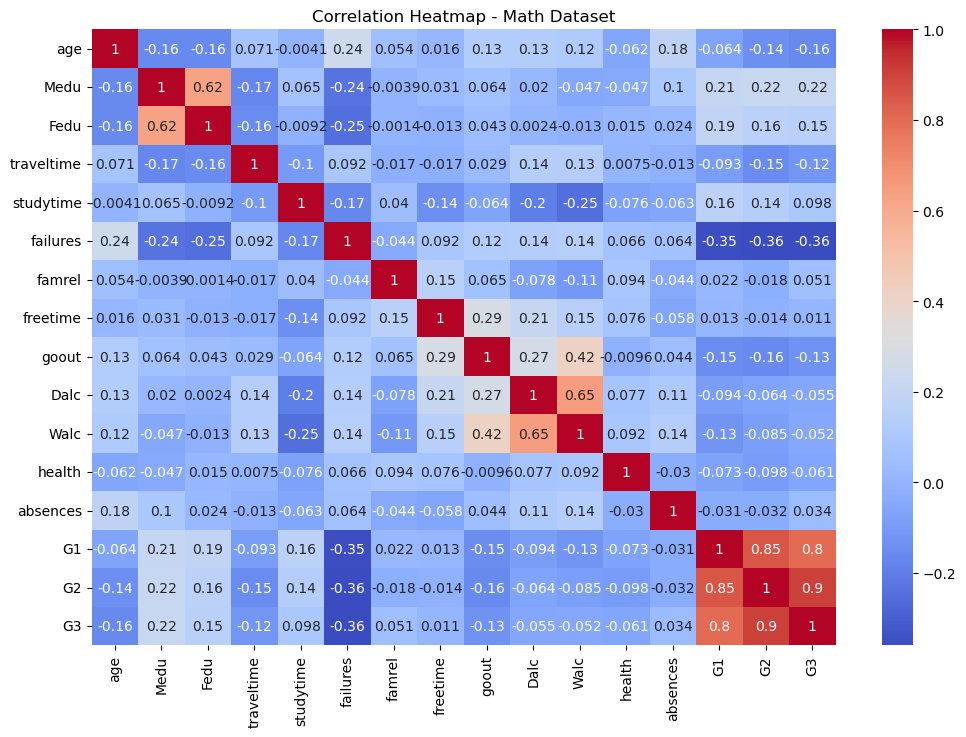

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = mat.select_dtypes(include='number')

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Math Dataset")
plt.show()


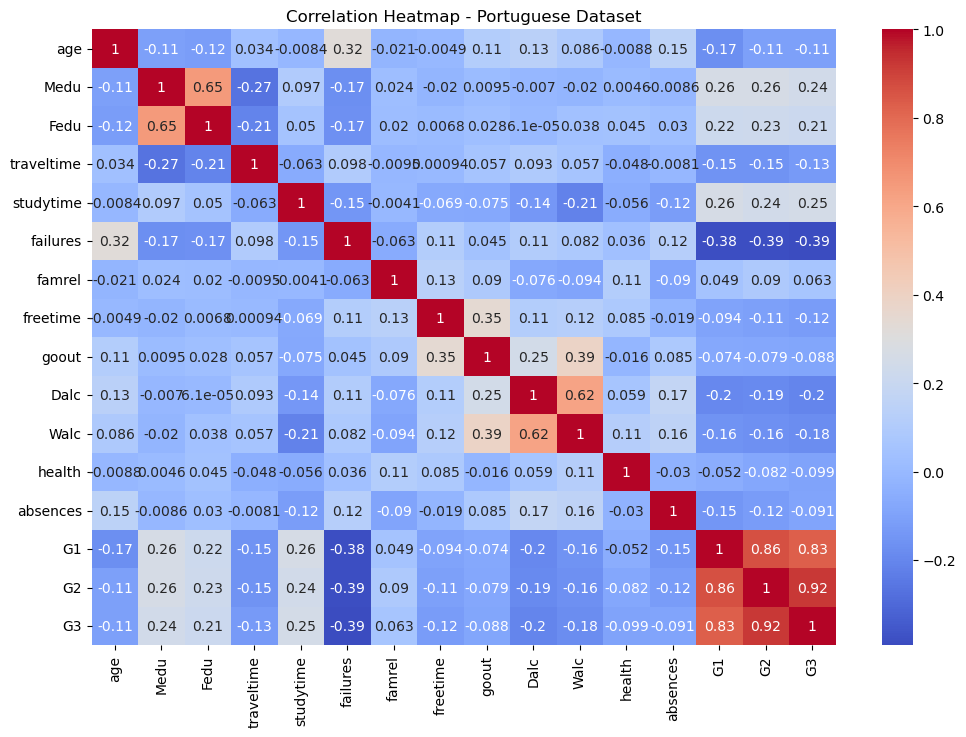

In [86]:
numeric_cols_por = por.select_dtypes(include='number')

plt.figure(figsize=(12,8))
sns.heatmap(numeric_cols_por.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Portuguese Dataset")
plt.show()


In [87]:
print(mat.columns)
print(por.columns)


Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


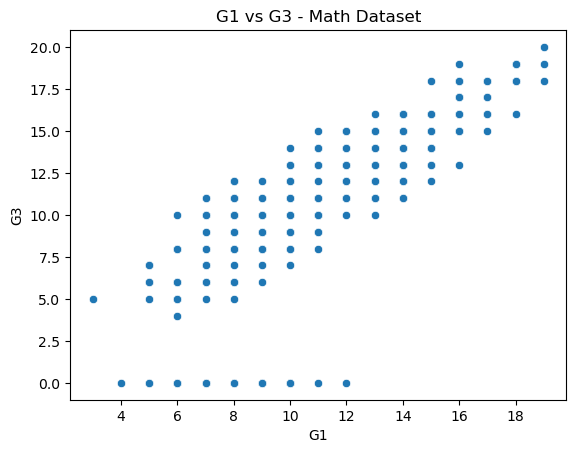

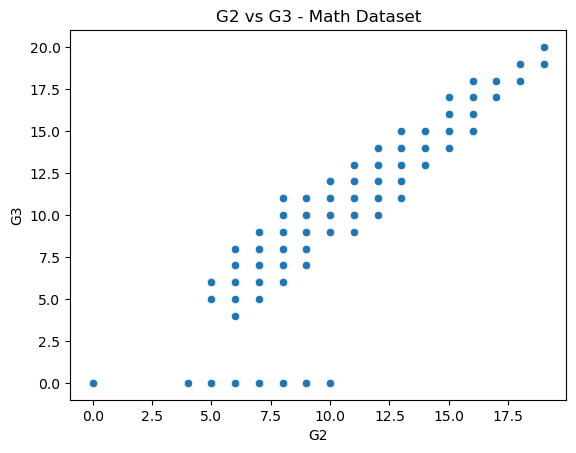

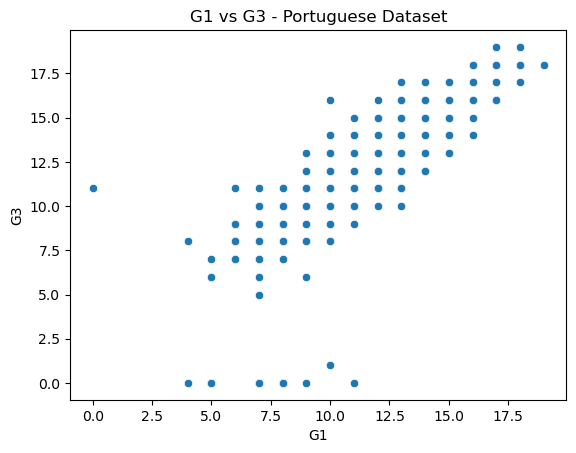

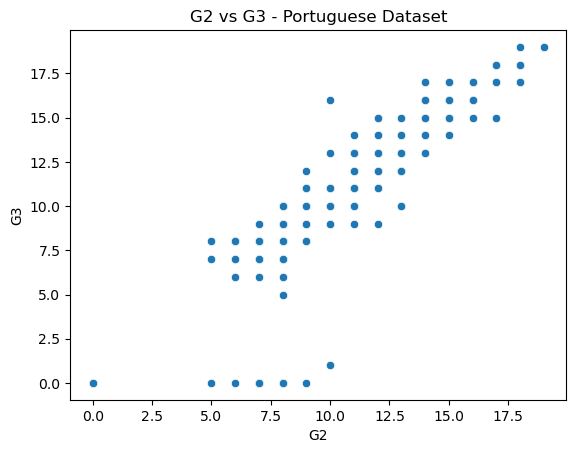

In [88]:
# Scatterplot for Math
sns.scatterplot(x='G1', y='G3', data=mat)
plt.title("G1 vs G3 - Math Dataset")
plt.show()

sns.scatterplot(x='G2', y='G3', data=mat)
plt.title("G2 vs G3 - Math Dataset")
plt.show()

# Scatterplot for Portuguese
sns.scatterplot(x='G1', y='G3', data=por)
plt.title("G1 vs G3 - Portuguese Dataset")
plt.show()

sns.scatterplot(x='G2', y='G3', data=por)
plt.title("G2 vs G3 - Portuguese Dataset")
plt.show()


In [89]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = mat.select_dtypes(include='object').columns
cat_cols_por = por.select_dtypes(include='object').columns

# Initialize LabelEncoder
le = LabelEncoder()

# Encode Math dataset
for col in cat_cols:
    mat[col] = le.fit_transform(mat[col])

# Encode Portuguese dataset
for col in cat_cols_por:
    por[col] = le.fit_transform(por[col])


In [90]:
# For Math dataset
X_mat = mat.drop('G3', axis=1)  # Features
y_mat = mat['G3']               # Target

# For Portuguese dataset
X_por = por.drop('G3', axis=1)
y_por = por['G3']


In [91]:
from sklearn.model_selection import train_test_split

# Math dataset
X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(
    X_mat, y_mat, test_size=0.2, random_state=42
)

# Portuguese dataset
X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(
    X_por, y_por, test_size=0.2, random_state=42
)


In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_mat = scaler.fit_transform(X_train_mat)
X_test_mat = scaler.transform(X_test_mat)

X_train_por = scaler.fit_transform(X_train_por)
X_test_por = scaler.transform(X_test_por)


In [94]:
from sklearn.linear_model import LinearRegression

# Math dataset
model_mat = LinearRegression()
model_mat.fit(X_train_mat, y_train_mat)
y_pred_mat = model_mat.predict(X_test_mat)

# Portuguese dataset
model_por = LinearRegression()
model_por.fit(X_train_por, y_train_por)
y_pred_por = model_por.predict(X_test_por)


In [95]:
from sklearn.metrics import mean_squared_error, r2_score

# Math
mse_mat = mean_squared_error(y_test_mat, y_pred_mat)
r2_mat = r2_score(y_test_mat, y_pred_mat)
print("Math Dataset -> MSE:", mse_mat, "R2:", r2_mat)

# Portuguese
mse_por = mean_squared_error(y_test_por, y_pred_por)
r2_por = r2_score(y_test_por, y_pred_por)
print("Portuguese Dataset -> MSE:", mse_por, "R2:", r2_por)


Math Dataset -> MSE: 5.032394108866744 R2: 0.7545777855043498
Portuguese Dataset -> MSE: 1.4370937042409997 R2: 0.8526317103852279


Insights

Features with the highest correlation with G3 are usually G1 and G2.

Categorical features like studytime, failures, or activities may also impact grades.

Comparing performance metrics (MSE, R²) shows how well the model predicts final grades.

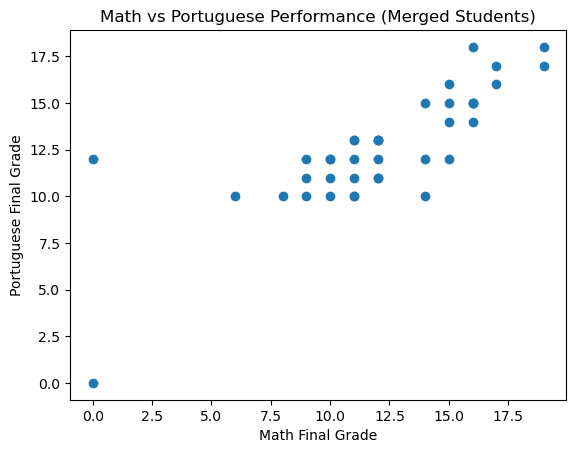

Correlation between Math and Portuguese final grades (merged students): 0.797020930131899
RMSE on test set: 2.0595607844878
Top 10 important features affecting combined performance:
age             0.227765
freetime        0.104038
Medu            0.063746
studytime       0.062937
goout           0.055191
reason_other    0.051429
nursery_yes     0.032013
health          0.031829
absences        0.028179
school_MS       0.027560
dtype: float64


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Load datasets
math_df = pd.read_csv("../data/student-mat.csv", sep=';')
port_df = pd.read_csv("../data/student-por.csv", sep=';')

# 2. Merge datasets on common demographic/family features
merge_cols = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu',
              'Mjob','Fjob','reason','guardian','traveltime','studytime','failures',
              'schoolsup','famsup','paid','activities','nursery','higher','internet',
              'romantic','famrel','freetime','goout','Dalc','Walc','health','absences']

merged_df = pd.merge(math_df, port_df, on=merge_cols, suffixes=('_math','_port'))

# 3. Compare Math vs Portuguese final grades for merged students
plt.scatter(merged_df['G3_math'], merged_df['G3_port'])
plt.xlabel('Math Final Grade')
plt.ylabel('Portuguese Final Grade')
plt.title('Math vs Portuguese Performance (Merged Students)')
plt.show()

correlation = merged_df['G3_math'].corr(merged_df['G3_port'])
print("Correlation between Math and Portuguese final grades (merged students):", correlation)

# 4. Create combined target: average of final grades
merged_df['G3_avg'] = merged_df[['G3_math','G3_port']].mean(axis=1)

# 5. Prepare features and target
X = merged_df.drop(columns=['G1_math','G2_math','G3_math','G1_port','G2_port','G3_port','G3_avg'])
y = merged_df['G3_avg']

# Convert categorical variables
X = pd.get_dummies(X, drop_first=True)

# 6. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Predictions and evaluation
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE on test set:", rmse)


# 9. Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
print("Top 10 important features affecting combined performance:")
print(importances.sort_values(ascending=False).head(10))


In [23]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [97]:
#start
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

import shap


In [100]:
df = pd.read_csv("../data/student-mat.csv", sep=';')
df.head(343)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,GP,F,18,U,LE3,T,3,3,services,services,...,5,3,3,1,1,1,7,16,15,17
339,GP,F,17,R,GT3,A,3,2,other,other,...,4,3,3,2,3,2,4,9,10,10
340,GP,F,19,U,GT3,T,2,1,services,services,...,4,3,4,1,3,3,4,11,12,11
341,GP,M,18,U,GT3,T,4,4,teacher,services,...,4,3,3,2,2,2,0,10,10,0


In [101]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [102]:
df['dropout_risk'] = np.where(df['G3'] < 10, 1, 0)


In [103]:
def performance_label(grade):
    if grade < 10:
        return 'Low'
    elif grade < 15:
        return 'Medium'
    else:
        return 'High'

df['performance_level'] = df['G3'].apply(performance_label)


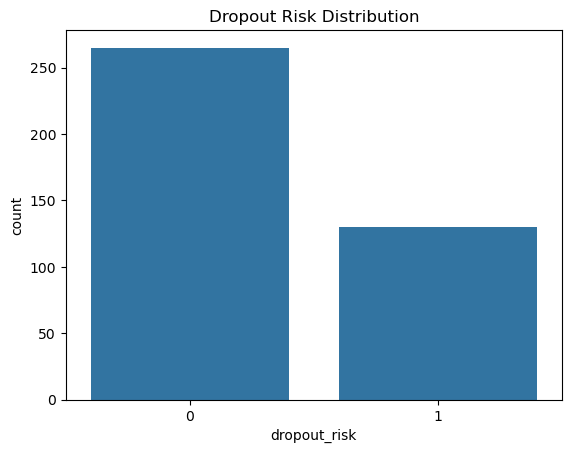

In [104]:
sns.countplot(x='dropout_risk', data=df)
plt.title("Dropout Risk Distribution")
plt.show()


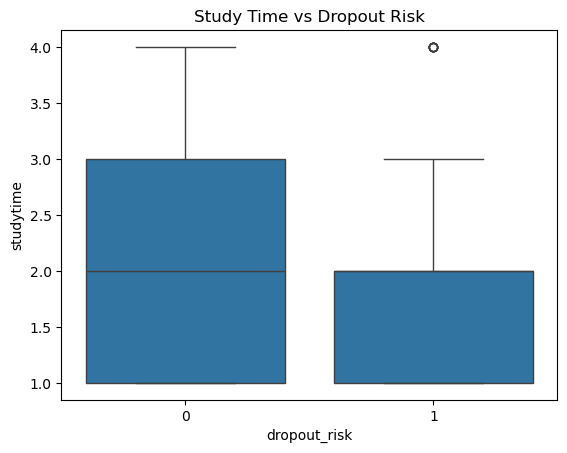

In [105]:
sns.boxplot(x='dropout_risk', y='studytime', data=df)
plt.title("Study Time vs Dropout Risk")
plt.show()


In [106]:
X = df.drop(['G3', 'dropout_risk', 'performance_level'], axis=1)
y = df['dropout_risk']


In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [108]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [109]:
log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

log_reg.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [110]:
dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

dt.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [36]:
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [111]:
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt,
    "Random Forest": rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.9367088607594937
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        53
           1       0.96      0.85      0.90        26

    accuracy                           0.94        79
   macro avg       0.94      0.91      0.93        79
weighted avg       0.94      0.94      0.94        79


Decision Tree
Accuracy: 0.8607594936708861
              precision    recall  f1-score   support

           0       0.90      0.89      0.90        53
           1       0.78      0.81      0.79        26

    accuracy                           0.86        79
   macro avg       0.84      0.85      0.84        79
weighted avg       0.86      0.86      0.86        79


Random Forest
Accuracy: 0.9113924050632911
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        53
           1       0.85      0.88      0.87        26

    accuracy                           0.91 

In [112]:
print(X_transformed.shape)
print(shap_values[1].shape)


(316, 58)
(58, 2)


In [113]:
explainer = shap.Explainer(
    rf.named_steps["classifier"],
    rf.named_steps["preprocessor"].transform(X_train),
    algorithm="tree"
)


C:\Users\Harsh\AppData\Local\Temp\ipykernel_3600\4248201933.py:16: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values[:, :, 1], X_transformed)


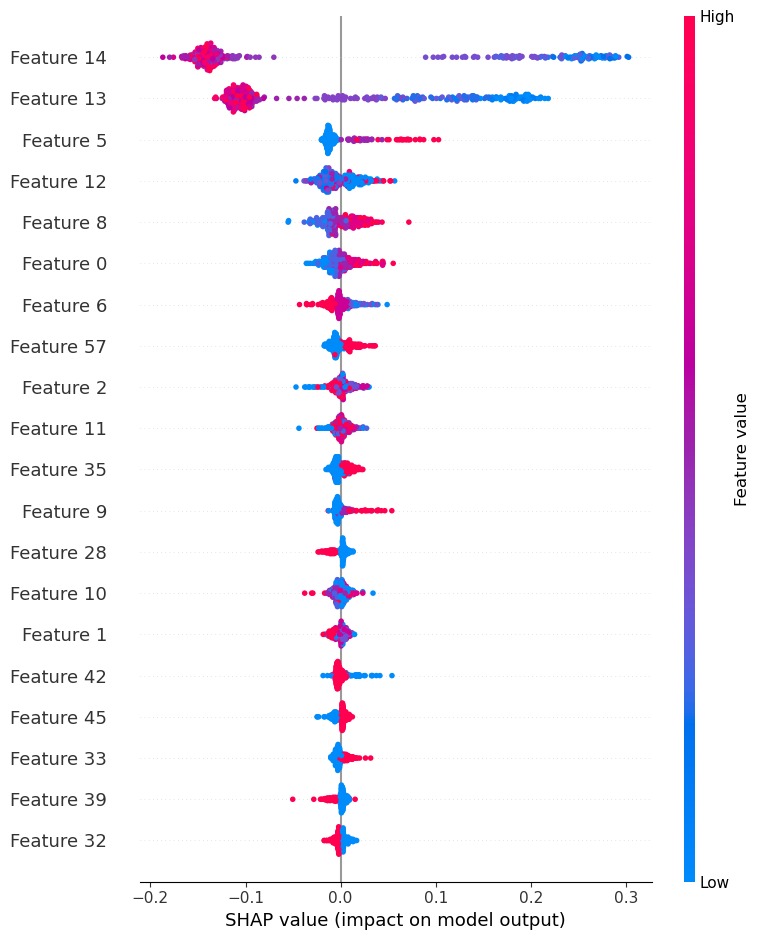

In [114]:
# Step 1: Transform data ONCE
X_transformed = rf.named_steps["preprocessor"].transform(X_train)

# Step 2: Create explainer
explainer = shap.TreeExplainer(
    rf.named_steps["classifier"]
)

# Step 3: Get SHAP values (disable strict check)
shap_values = explainer(
    X_transformed,
    check_additivity=False
)

# Step 4: Plot
shap.summary_plot(shap_values[:, :, 1], X_transformed)


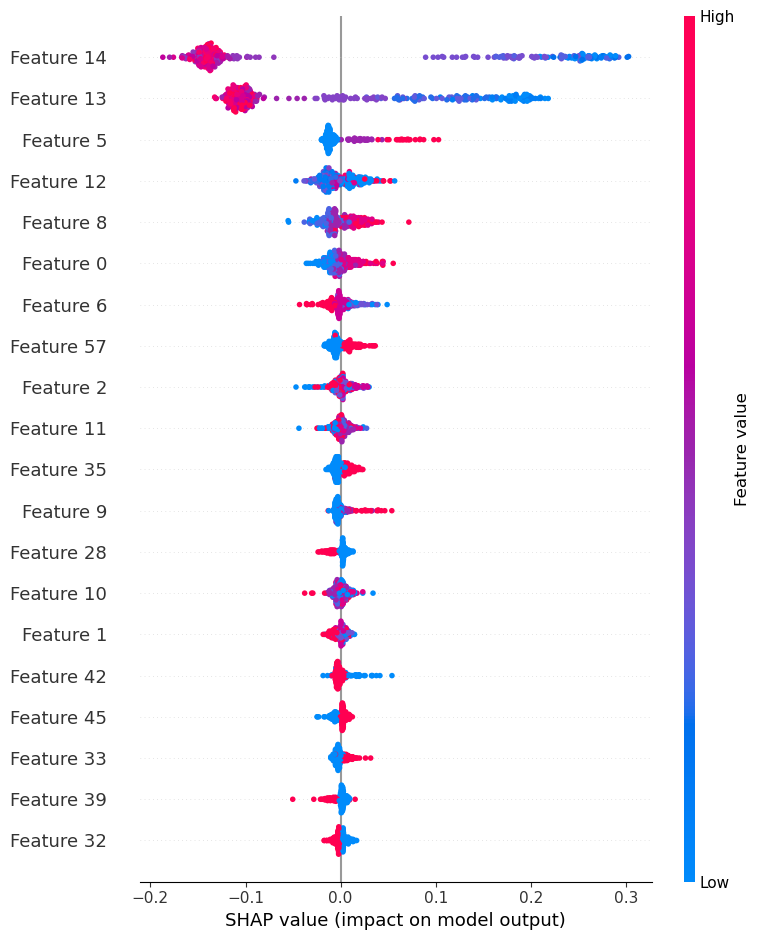

In [58]:
shap.summary_plot(shap_values[:, :, 1], X_transformed)


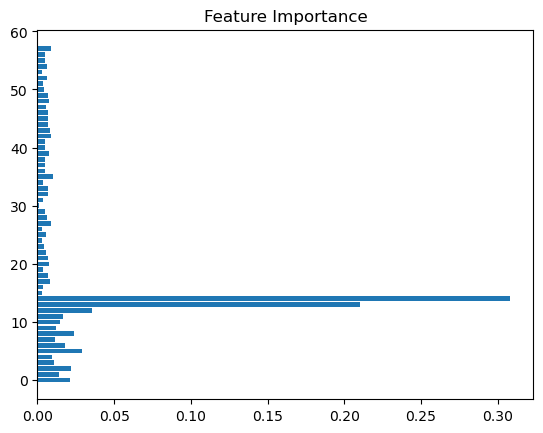

In [47]:
importances = rf.named_steps['classifier'].feature_importances_
plt.barh(range(len(importances)), importances)
plt.title("Feature Importance")
plt.show()


In [49]:
import shap
print(shap.__version__)


0.48.0
